In [3]:
import pandas as pd
import tensorflow as tf

In [4]:
# reading a csv file from my local
diabetes = pd.read_csv('/Users/mohamedali/Desktop/Python-DS-ML/Tensorflow/Tensorflow-Bootcamp-master/02-TensorFlow-Basics/pima-indians-diabetes.csv')

In [5]:
# getting the first 5 pieces of data including columns
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [6]:
# normalize data aka clean data
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [7]:
# get list of columns to normalize
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
'Insulin', 'BMI', 'Pedigree']

In [8]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x-x.min()) / (x.max() - x.min()))

In [9]:
 diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [10]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [11]:
# creating feature numerical columns 
# continious values

num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [12]:
#  categorical features - noncontinious values
# use a vocab list or hashbucket

# here we know we have four Groups to choose from from our Group Column
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list(
    'Group', ['A','B','C','D'])

In [13]:
# # if we have alot of groups or don't know all of them we can set a bucket
# # size
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket(
#     'Group', hash_bucket_size=10)

In [14]:
# feature engineering
# converting Age to categorical column. can get more info out of our data 

import matplotlib.pyplot as plt
%matplotlib inline

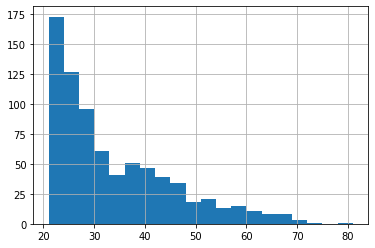

In [15]:
diabetes['Age'].hist(bins=20)

In [16]:
# take a continious value and bucket it into categories

age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [17]:
age_bucket.hist()

AttributeError: '_BucketizedColumn' object has no attribute 'hist'

In [18]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,assigned_group
            , age_bucket]

In [19]:
# TRAIN TEST SPLIT

x_data = diabetes.drop('Class', axis = 1)

In [20]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [21]:
labels = diabetes['Class']

In [22]:
labels

0      1
1      0
2      1
3      0
4      1
5      0
6      1
7      0
8      1
9      1
10     0
11     1
12     0
13     1
14     1
15     1
16     1
17     1
18     0
19     1
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     0
28     0
29     0
      ..
738    0
739    1
740    1
741    0
742    0
743    1
744    0
745    0
746    1
747    0
748    1
749    1
750    1
751    0
752    0
753    1
754    1
755    1
756    0
757    1
758    0
759    1
760    0
761    1
762    0
763    0
764    0
765    0
766    1
767    0
Name: Class, Length: 768, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size= 0.3, random_state=101)

In [25]:
# create input function 
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size= 10, num_epochs= 1000,
                                                shuffle=True)

In [26]:
# create the model
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/qy/8gpp2k295j980h0fyf_7b4h80000gp/T/tmpw7p1bett', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [27]:
# train the model
model.train(input_fn = input_func, steps = 1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/qy/8gpp2k295j980h0fyf_7b4h80000gp/T/tmpw7p1bett/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 267.449
INFO:tensorflow:loss = 4.257673, step = 101 (0.375 sec)
INFO:tensorflow:global_step/sec: 331.437
INFO:tensorflow:loss = 4.672636, step = 201 (0.304 sec)
INFO:tensorflow:global_step/sec: 336.229
INFO:tensorflow:loss = 5.9033833, step = 301 (0.296 sec)
INFO:tensorflow:global_step/sec: 361.823
INFO:tensorflow:loss = 6.4272227, step = 401 (0.278 sec)
INFO:tensorflow:global_step/sec: 309.6
INFO:tensorflow:loss = 4.6253786, step = 501 (0.325 sec)
INFO:tensorflow:global_step/sec: 369.816
INFO:tensorflow:loss = 5.0208178, step = 601 (0.273 sec)
INFO:tensorflow:global_step/sec: 352.77
INFO:tensorflow:loss = 5.843871, step = 701 (0.281 sec)
INFO:tensorflow:global_step/sec: 288.883
INFO:tensorflow:loss = 4.2860537, step = 801 (0.346 sec)
INFO:tensorflow:g

In [28]:
# this our model being ran on our eval or test data
# we set shuffle to False since we want to test in the same order
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size= 10,
                                                     num_epochs=1, shuffle=False)

In [29]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2019-07-17-01:46:07
INFO:tensorflow:Restoring parameters from /var/folders/qy/8gpp2k295j980h0fyf_7b4h80000gp/T/tmpw7p1bett/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2019-07-17-01:46:07
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.73593074, accuracy_baseline = 0.64935064, auc = 0.80094653, auc_precision_recall = 0.6483043, average_loss = 0.52911323, global_step = 1000, label/mean = 0.35064936, loss = 5.092715, prediction/mean = 0.3932424


In [30]:
# get some predictions on new data
# we dont have new data so we just use the same test but dont set the 
# y - paramater since we don't know the y-values if we are predicting
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10
                                                     ,num_epochs=1, shuffle=False)


In [31]:
predictions = model.predict(pred_input_func)

In [32]:
my_pred = list(predictions)

INFO:tensorflow:Restoring parameters from /var/folders/qy/8gpp2k295j980h0fyf_7b4h80000gp/T/tmpw7p1bett/model.ckpt-1000


In [33]:
# now we can see our model predictions if they have diabetes 1 or dont 0
my_pred

[{'logits': array([0.19763434], dtype=float32),
  'logistic': array([0.5492484], dtype=float32),
  'probabilities': array([0.45075163, 0.5492484 ], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([0.7672745], dtype=float32),
  'logistic': array([0.682931], dtype=float32),
  'probabilities': array([0.31706896, 0.682931  ], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-0.43036497], dtype=float32),
  'logistic': array([0.39403918], dtype=float32),
  'probabilities': array([0.60596085, 0.39403918], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.5531287], dtype=float32),
  'logistic': array([0.36513883], dtype=float32),
  'probabilities': array([0.6348612 , 0.36513883], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-1.6317179], dtype=float32),
  'logistic': a

In [34]:
# Now lets use a DNN

In [35]:
# hidden units- how many neurons and layers
# 10,10,10 - 10 neurons densely connected
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns= feat_cols,
                                      n_classes= 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/qy/8gpp2k295j980h0fyf_7b4h80000gp/T/tmp39w916r4', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [36]:
# wrapping categorical column with a embedding_colum since we get error
# if we try to run dnn_model.train(input_fn = input_func, steps = 1000)

# assigned_group - pass in categorical column
# dimension - num of col
embedded_group_col = tf.feature_column.embedding_column(assigned_group,
                                                       dimension=4)

In [37]:
# here we replace assigned_groups with embedded_group_col
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,embedded_group_col
            , age_bucket]

In [38]:
# get the input function 
input_func = tf.estimator.inputs.pandas_input_fn(X_train, y_train, batch_size= 10,
                                                num_epochs=1000, shuffle=True)

In [39]:
# create our DNN model
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,20,20,10,10], feature_columns=feat_cols,
                                      n_classes= 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/qy/8gpp2k295j980h0fyf_7b4h80000gp/T/tmpis07v1xt', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [40]:
# train the model
dnn_model.train(input_fn = input_func , steps = 1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/qy/8gpp2k295j980h0fyf_7b4h80000gp/T/tmpis07v1xt/model.ckpt.
INFO:tensorflow:loss = 6.974886, step = 1
INFO:tensorflow:global_step/sec: 244.633
INFO:tensorflow:loss = 5.467309, step = 101 (0.410 sec)
INFO:tensorflow:global_step/sec: 254.62
INFO:tensorflow:loss = 5.2355194, step = 201 (0.396 sec)
INFO:tensorflow:global_step/sec: 345.623
INFO:tensorflow:loss = 6.734731, step = 301 (0.294 sec)
INFO:tensorflow:global_step/sec: 242.55
INFO:tensorflow:loss = 3.618723, step = 401 (0.412 sec)
INFO:tensorflow:global_step/sec: 335.849
INFO:tensorflow:loss = 5.7516727, step = 501 (0.293 sec)
INFO:tensorflow:global_step/sec: 352.267
INFO:tensorflow:loss = 2.7900484, step = 601 (0.286 sec)
INFO:tensorflow:global_step/sec: 294.307
INFO:tensorflow:loss = 2.6152265, step = 701 (0.334 sec)
INFO:tensorflow:global_step/sec: 367.626
INFO:tensorflow:loss = 2.9695034, step = 801 (0.278 sec)
INFO:tensorflow:

In [41]:
# evaluate it agianst our test data
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test,
                                                     batch_size=10,
                                                     num_epochs=1,
                                                     shuffle=False)

In [42]:
# SEE RESULTS!
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2019-07-17-01:47:28
INFO:tensorflow:Restoring parameters from /var/folders/qy/8gpp2k295j980h0fyf_7b4h80000gp/T/tmpis07v1xt/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2019-07-17-01:47:28
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7619048, accuracy_baseline = 0.64935064, auc = 0.81987655, auc_precision_recall = 0.7035088, average_loss = 0.50960135, global_step = 1000, label/mean = 0.35064936, loss = 4.904913, prediction/mean = 0.39680544


{'accuracy': 0.7619048,
 'accuracy_baseline': 0.64935064,
 'auc': 0.81987655,
 'auc_precision_recall': 0.7035088,
 'average_loss': 0.50960135,
 'label/mean': 0.35064936,
 'loss': 4.904913,
 'prediction/mean': 0.39680544,
 'global_step': 1000}